In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/food-box-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer                583 non-null    object 
 1   distribution_method     583 non-null    object 
 2   date                    583 non-null    object 
 3   planned_method          583 non-null    object 
 4   final_method            583 non-null    object 
 5   completed_at            583 non-null    object 
 6   last_box_date           15 non-null     object 
 7   datetime                583 non-null    object 
 8   weekday                 583 non-null    object 
 9   hour                    583 non-null    int64  
 10  morning_afternoon       583 non-null    object 
 11  is_unenrolled           583 non-null    bool   
 12  completed_days_after    583 non-null    float64
 13  deviation_from_plan     583 non-null    bool   
 14  deviation_from_current  583 non-null    bo

Text(0.5, 1.0, 'Average Box Counts')

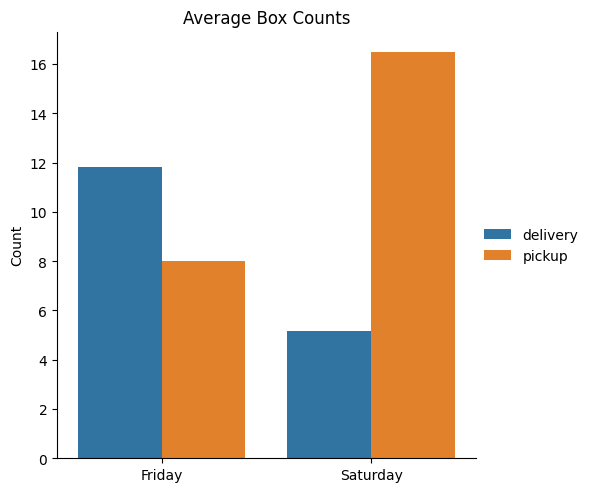

In [28]:
# get counts per date, weekday, and final_method
no_reallocations = df['final_method'] != 'reallocate'
weekly_counts_df = df[no_reallocations].groupby(['date', 'weekday', 'final_method'], as_index=False).size()

# get average counts for weekday, final_method groups
avg_counts_df = weekly_counts_df.groupby(['weekday', 'final_method'], as_index=False).mean()

# plot a bar chart
g = sns.catplot(data=avg_counts_df, kind='bar', x='weekday', y='size', hue='final_method')
g.set_axis_labels('', 'Count')
g.legend.set_title('')
g.ax.set_title('Average Box Counts')